# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,2,-0.366403,-0.529891,1.224275,-0.170353,2.797608,-2.960380,0.503309,2.175944,1.066994,...,2.206299,-0.502463,-2.004801,-0.438421,0.785737,-1.988872,-0.893650,1.528710,3.073825,1.899409
1,1,-0.022685,-0.080576,1.521277,0.333096,2.073513,-2.504466,0.212547,1.684705,0.283884,...,1.657404,-0.800799,-1.176540,-0.398753,0.854077,-1.421040,-0.487865,1.479854,2.290627,1.117899
2,2,-0.052578,-0.362782,1.127761,-0.077959,2.745393,-3.656872,0.171195,2.509113,0.844297,...,2.001973,-0.640431,-2.522731,-0.346004,0.709842,-1.786768,-0.986672,1.240316,3.191606,2.450312
3,0,-0.095125,-0.152655,1.517417,0.131297,2.404263,-2.807642,0.213807,2.105238,0.445960,...,1.930249,-0.709466,-1.687836,-0.319494,0.988847,-1.690042,-0.947813,1.495447,2.861046,1.617567
4,1,0.172483,-0.599030,1.382951,-0.103038,2.338006,-2.988720,0.623872,2.488591,0.634746,...,1.437723,-0.653985,-2.120162,-0.160325,0.505564,-1.804533,-0.608725,1.377656,2.063588,1.264385


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0   -0.366403 -0.529891  1.224275 -0.170353  2.797608 -2.960380  0.503309   
1   -0.022685 -0.080576  1.521277  0.333096  2.073513 -2.504466  0.212547   
2   -0.052578 -0.362782  1.127761 -0.077959  2.745393 -3.656872  0.171195   
3   -0.095125 -0.152655  1.517417  0.131297  2.404263 -2.807642  0.213807   
4    0.172483 -0.599030  1.382951 -0.103038  2.338006 -2.988720  0.623872   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.038708 -0.484153  1.432885  0.085147  2.330397 -2.537074  0.430618   
177 -0.067312 -0.207609  1.119932 -0.150279  2.498550 -3.748665  0.099322   
178  0.037973 -0.539611  1.428888 -0.079274  2.637841 -3.243155  0.248875   
179 -0.066098 -0.426008  1.787303  0.068520  2.061454 -1.809541  0.379197   
180 -0.103007 -0.591417  0.982493 -0.205921  2.387277 -3.304925  0.182727   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       n_estimators=10, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5347290640394089


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7986111111111112
Final accuracy on the testing dataset: 0.40540540540540543


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[61  0  6]
 [ 9 14  2]
 [12  0 40]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [1 0 0 0 2 2 0 2 0 0 2 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 1 2
 2 0 2 0 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 0 0 2 0 2 1 0 0 0 0 2 2 2 2 2 0 0
 0 0 0 2 0 0 0 2 2 0 0 1 2 0 2 1 0 0 0 2 2 0 1 0 1 0 2 2 0 0 2 2 2 1 0 2 0
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        67
           1       1.00      0.56      0.72        25
           2       0.83      0.77      0.80        52

    accuracy                           0.80       144
   macro avg       0.86      0.75      0.78       144
weighted avg       0.82      0.80      0.79       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  3  4]
 [ 2  0  4]
 [ 9  0  4]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 2 1 0 0 0 2 0 2 0 0 0 0 2 0 1 2 0 1 2 0 2 0 2 0 2 0 0 2 2 0 0 0 0 2 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55        18
           1       0.00      0.00      0.00         6
           2       0.33      0.31      0.32        13

    accuracy                           0.41        37
   macro avg       0.28      0.31      0.29        37
weighted avg       0.36      0.41      0.38        37



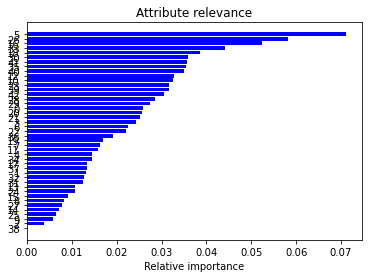

0 = 0.0259732102742459
1 = 0.013170508033073191
2 = 0.0038608122414879294
3 = 0.024286566034908575
4 = 0.014568844937630809
5 = 0.07108323418971729
6 = 0.022590799482715297
7 = 0.016328456612865118
8 = 0.008227177445375081
9 = 0.005707561213891891
10 = 0.03252794911088881
11 = 0.01594584884793133
12 = 0.032731222885168144
13 = 0.010798397781981654
14 = 0.007060616771263533
15 = 0.009193791060667523
16 = 0.05232624594932587
17 = 0.013493807225975573
18 = 0.03853650075487918
19 = 0.016980165053364044
20 = 0.025714451420969852
21 = 0.025114898183429935
22 = 0.02202427048832277
23 = 0.03177663039348995
24 = 0.010715958663460503
25 = 0.006471862912234018
26 = 0.05822790394049306
27 = 0.007819061526562162
28 = 0.028533942424492177
29 = 0.027378637165685442
30 = 0.035948038952192986
31 = 0.01239532693089294
32 = 0.012783381474893468
33 = 0.044080537141337126
34 = 0.014568311591523917
35 = 0.03550104769130153
36 = 0.019255734970118565
37 = 0.013334385225247828
38 = 0.0
39 = 0.03172797495813238

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.